Application of PCA to improve model (SVM) built to predict the presence of Breast Cancer

In [30]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Reading the dataset in real time

df = pd.read_csv('/content/breast_cancer.csv')
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  outcome  
0          0.4601                  0.11890        1  
1          0.2750                  0.08902        1  
2          0.3613                  0.08758        1  
3          0.6638                  0.17300        1  
4          0.2364                  0.07678        1  

[5 rows x 31 columns]

In [32]:
# Finding no.of examples in the dataset

df.shape

(569, 31)

In [33]:
# Finding out the data type of each feature

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [34]:
df.isnull().sum() # There are no null values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
outcome                    0
dtype: int64

In [35]:
# Checking the no.of data with labels 0 i.e. breast cancer negative and no.of labels with 1 i.e. breast cancer is positive

df.outcome.value_counts()

0    357
1    212
Name: outcome, dtype: int64

In [36]:
# X and Y split

X =df.iloc[:,:-1]
X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [37]:
Y =df.outcome
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: outcome, dtype: int64

In [38]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [39]:
X_train.shape

(455, 30)

In [40]:
X_test.shape

(114, 30)

In [41]:
print(Y.shape, Y_train.shape, Y_test.shape)

(569,) (455,) (114,)


Model Building

In [42]:
# Importing SVC from sklearn.svm
# Training the model with X_train and Y_train

from sklearn.svm import SVC
model = SVC() # Model initialisation
model.fit(X_train, Y_train)

SVC()

In [43]:
# Predicting on test data

y_pred = model.predict(X_test)

In [44]:
# Predicting on training data

y_pred1 = model.predict(X_train)

In [45]:
# Model Evaluation

from sklearn.metrics import accuracy_score,classification_report

In [46]:
# Evaluating the model testing and training accuracies

print("Test accuracy : ", accuracy_score(Y_test,y_pred))
print("Train accuracy : ", accuracy_score(Y_train, y_pred1))

Test accuracy :  0.9298245614035088
Train accuracy :  0.9098901098901099


In [47]:
# Checking the correctly and incorrectly predicted values on the data set

pd.crosstab(Y_test, y_pred)

col_0     0   1
outcome        
0        66   1
1         7  40

Testing SVM with random example with 30 features

In [48]:
# Disable the specific warning about feature names
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
# Sample data for prediction
    result = model.predict([[17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]])

if result == 0:
  print("Breast Cancer positive")
else:
  print("Breast Cancer Negative")

Breast Cancer Negative


Implemeenting PCA

In [49]:
# Import PCA (Principal Component Analysis) from sklearn.decomposition module
from sklearn.decomposition import PCA

# Import StandardScaler from sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Initialize PCA with 4 components
pca = PCA(n_components=4)

# Initialize StandardScaler
scaler = StandardScaler()

# Apply PCA transformation to X_train data, reducing dimensionality to 4 components
X_train_pca = pca.fit_transform(X_train)

# Apply PCA transformation to X_test data using parameters learned from X_train
X_test_pca = pca.transform(X_test)

# Scale the PCA-transformed X_train data to have mean 0 and standard deviation 1
X_train_scaled = scaler.fit_transform(X_train_pca)

# Scale the PCA-transformed X_test data using the parameters learned from X_train
X_test_scaled = scaler.transform(X_test_pca)

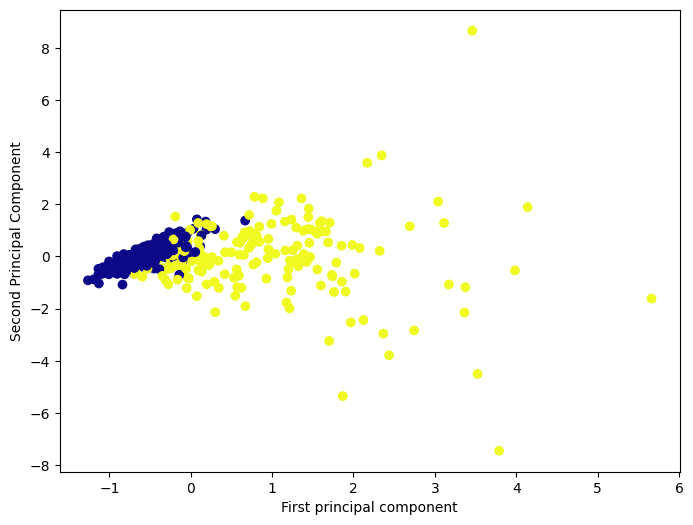

In [50]:
# Import matplotlib.pyplot module for visualization
import matplotlib.pyplot as plt

# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a scatter plot using the first and second principal components from the scaled training data
# Color the points based on the corresponding labels in Y_train using the 'plasma' colormap
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=Y_train, cmap='plasma')

# Set the label for the x-axis
plt.xlabel('First principal component')

# Set the label for the y-axis
plt.ylabel('Second Principal Component')

# Display the plot
plt.show()

In [51]:
from sklearn.svm import SVC
model = SVC() #Leaving default kernel as kernel="linear" giving both testing and training accuracy of 100%
clf = model.fit(X_train_scaled, Y_train)
y_pred_pca = model.predict(X_test_scaled)

In [52]:
# Import necessary functions from sklearn.metrics module
from sklearn.metrics import accuracy_score, classification_report

# Print the training accuracy by comparing the true labels Y_train with the predicted labels from the model
print(f"The training accuracy: {accuracy_score(Y_train, model.predict(X_train_scaled))}")

# Print the testing accuracy by comparing the true labels Y_test with the predicted labels y_pred_pca
print(f"The testing accuracy: {accuracy_score(Y_test, y_pred_pca)}")

# Print the cross-tabulation (confusion matrix) of true test labels Y_test and predicted labels y_pred_pca
print(pd.crosstab(Y_test, y_pred_pca))

# Print the classification report containing precision, recall, F1-score, and support for each class
print(classification_report(Y_test, y_pred_pca))

The training accuracy: 0.9626373626373627
The testing accuracy: 0.956140350877193
col_0     0   1
outcome        
0        64   3
1         2  45
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Testing the PCA model with random example with only 4 features

In [53]:
# Disable the specific warning about feature names
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
# Sample data for prediction
    result = model.predict([[17.99,10.38,122.8,1001]])

if result == 0:
  print("Breast Cancer positive")
else:
  print("Breast Cancer Negative")

Breast Cancer Negative


Interpretation

By implementing PCA on the model built by SVM, the dimensions is reduced from 30 features to 4 features. Hence the dimensionality reduction help the model to increase its testing accuracy from 92.98% to 95.61% and also improved training accuracy from 90.98% to 96.26%